 ## GetAround Delay Analysis (EDA and export for Streamlit)

In [255]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (8, 4)

DATA_URL_DELAY = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx"
OUTPUT_DIR = "../data/processed"
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "getaround_delay_for_streamlit.csv")


 ## 1) Load data

In [256]:
# Read first sheet (main data)
data = pd.read_excel(DATA_URL_DELAY, sheet_name=0)
print("Shape:", data.shape)
display(data.head())

# Quick info
display(data.info())
display(data.describe(include="all"))


Shape: (21310, 7)


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


None

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


 ## 2) Basic checks

In [257]:
# Missing values
missing_counts = data.isna().sum().sort_values(ascending=False)
missing_pct = (data.isna().mean() * 100).sort_values(ascending=False)
print("Missing values (count):\n", missing_counts)
print("\nMissing values (%):\n", missing_pct.round(2))

# Value distributions for key columns
for col in ["state", "checkin_type"]:
    if col in data.columns:
        print(f"\n{col} value_counts (incl. NaN):")
        print(data[col].value_counts(dropna=False))

# Uniques
if "car_id" in data.columns:
    print("\nUnique cars:", data["car_id"].nunique())
if "rental_id" in data.columns:
    print("Unique rentals:", data["rental_id"].nunique())


Missing values (count):
 time_delta_with_previous_rental_in_minutes    19469
previous_ended_rental_id                      19469
delay_at_checkout_in_minutes                   4964
checkin_type                                      0
car_id                                            0
rental_id                                         0
state                                             0
dtype: int64

Missing values (%):
 time_delta_with_previous_rental_in_minutes    91.36
previous_ended_rental_id                      91.36
delay_at_checkout_in_minutes                  23.29
checkin_type                                   0.00
car_id                                         0.00
rental_id                                      0.00
state                                          0.00
dtype: float64

state value_counts (incl. NaN):
state
ended       18045
canceled     3265
Name: count, dtype: int64

checkin_type value_counts (incl. NaN):
checkin_type
mobile     17003
connect     4307
Name: cou

In [258]:
# Quick numeric overview
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", num_cols)
display(data[num_cols].describe().T)



Numeric columns: ['rental_id', 'car_id', 'delay_at_checkout_in_minutes', 'previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes']


,count,mean,std,min,25%,50%,75%,max
rental_id,21310.0,549712.880338,13863.446964,504806.0,540613.25,550350.0,560468.5,576401.0
car_id,21310.0,350030.603426,58206.249765,159250.0,317639.00,368717.0,394928.0,417675.0
delay_at_checkout_in_minutes,16346.0,59.701517,1002.561635,-22433.0,-36.00,9.0,67.0,71084.0
previous_ended_rental_id,1841.0,550127.411733,13184.023111,505628.0,540896.00,550567.0,560823.0,575053.0
time_delta_with_previous_rental_in_minutes,1841.0,279.288430,254.594486,0.0,60.00,180.0,540.0,720.0


=> delay_at_checkout_in_minutes goes from -22433 min (15 days and a half) to 71084 min (49 days) : some outliers... And there are a lot of empty to be filled by 0.

In [259]:
data["delay_at_checkout_in_minutes"] = data["delay_at_checkout_in_minutes"].fillna(0)

 ### 3) Just a few plots

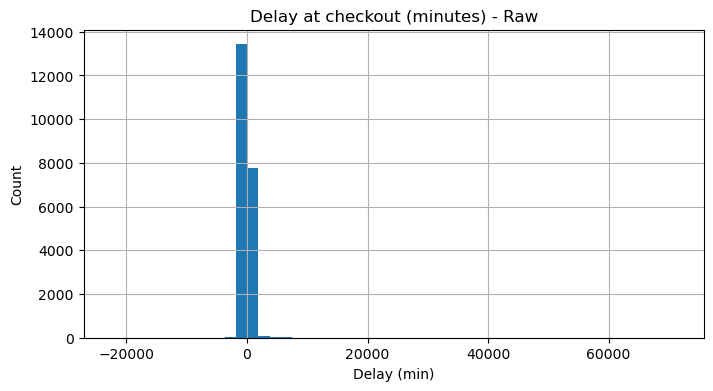

In [260]:
# 3.1 Histogram of checkout delays
if "delay_at_checkout_in_minutes" in data.columns:
    data["delay_at_checkout_in_minutes"].hist(bins=50)
    plt.title("Delay at checkout (minutes) - Raw")
    plt.xlabel("Delay (min)")
    plt.ylabel("Count")
    plt.show()


Huge spike near 0 = the majority of rentals finish on time or within a small delay (a few minutes).

Long flat tail to the right (positive side) = some massive outliers — delays in the tens of thousands of minutes (that’s several weeks).

The negative side (left) = cars returned early (before expected checkout). Some negative delays are normal (−10, −60…), but extreme ones (−20 000 min = −14 days) are obviously errors or system artifacts.

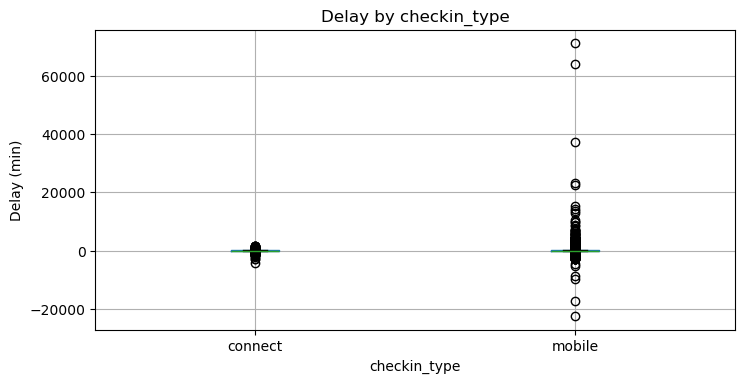

In [261]:
# 3.2 Boxplot of delays by checkin_type
if {"delay_at_checkout_in_minutes", "checkin_type"}.issubset(data.columns):
    data.boxplot(column="delay_at_checkout_in_minutes", by="checkin_type")
    plt.title("Delay by checkin_type")
    plt.suptitle("")
    plt.xlabel("checkin_type")
    plt.ylabel("Delay (min)")
    plt.show()


=> self-service rentals are more standardized, while human interactions introduce recording errors or longer delays ?

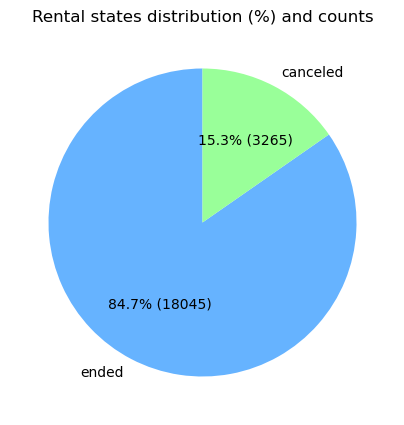

In [262]:
# 3.3 Pie chart of rental states
if "state" in data.columns:
    state_counts = data["state"].value_counts(dropna=False)
    total = state_counts.sum()

    plt.figure(figsize=(5,5))
    plt.pie(
        state_counts,
        labels=state_counts.index,
        # show both percentage and count
        autopct=lambda p: f"{p:.1f}% ({int(p * total / 100)})",
        startangle=90,
        colors=["#66b3ff", "#99ff99"]  # optional, light & readable
    )
    plt.title("Rental states distribution (%) and counts")
    plt.show()


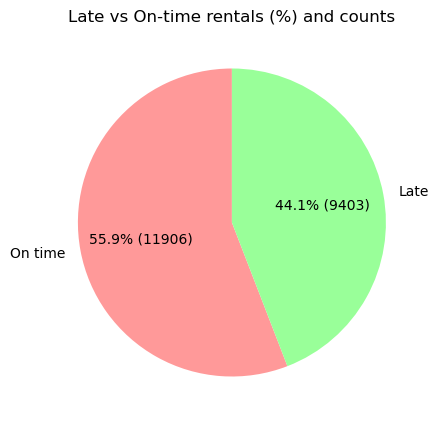

In [263]:
# 3.4 Pie chart of late vs on-time rentals
if "delay_at_checkout_in_minutes" in data.columns:
    # Define late vs on-time (delay > 0 → late)
    late_counts = (
        data["delay_at_checkout_in_minutes"]
        .apply(lambda x: "Late" if x > 0 else "On time")
        .value_counts(dropna=False)
    )
    total = late_counts.sum()

    plt.figure(figsize=(5,5))
    plt.pie(
        late_counts,
        labels=late_counts.index,
        autopct=lambda p: f"{p:.1f}% ({int(p * total / 100)})",
        startangle=90,
        colors=["#ff9999", "#99ff99"],  # red for late, green for on-time
    )
    plt.title("Late vs On-time rentals (%) and counts")
    plt.show()


 ## 4) Feature engineering. 

In [264]:
df_for_streamlit = data.copy()

df_for_streamlit.dtypes

rental_id                                       int64
car_id                                          int64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                      float64
time_delta_with_previous_rental_in_minutes    float64
dtype: object

In [265]:
cols_to_int = [
    "delay_at_checkout_in_minutes",
    "previous_ended_rental_id",
    "time_delta_with_previous_rental_in_minutes"
]

for c in cols_to_int:
    if c in df_for_streamlit.columns:
        df_for_streamlit[c] = df_for_streamlit[c].astype("Int64")  # capital I = pandas nullable integer

In [266]:
df_for_streamlit.dtypes

rental_id                                      int64
car_id                                         int64
checkin_type                                  object
state                                         object
delay_at_checkout_in_minutes                   Int64
previous_ended_rental_id                       Int64
time_delta_with_previous_rental_in_minutes     Int64
dtype: object

In [267]:
df_for_streamlit.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,0,<NA>,<NA>
1,507750,269550,mobile,ended,-81,<NA>,<NA>
2,508131,359049,connect,ended,70,<NA>,<NA>
3,508865,299063,connect,canceled,0,<NA>,<NA>
4,511440,313932,mobile,ended,0,<NA>,<NA>


In [268]:
prev = (
    df_for_streamlit[["rental_id", "checkin_type", "delay_at_checkout_in_minutes"]]
      .set_index("rental_id")
      .add_prefix("previous_")
)

df_for_streamlit = df_for_streamlit.join(prev, on="previous_ended_rental_id")

df_for_streamlit.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_checkin_type,previous_delay_at_checkout_in_minutes
0,505000,363965,mobile,canceled,0,<NA>,<NA>,NaN,<NA>
1,507750,269550,mobile,ended,-81,<NA>,<NA>,NaN,<NA>
2,508131,359049,connect,ended,70,<NA>,<NA>,NaN,<NA>
3,508865,299063,connect,canceled,0,<NA>,<NA>,NaN,<NA>
4,511440,313932,mobile,ended,0,<NA>,<NA>,NaN,<NA>


In [269]:
# add previous_delay - delta column : to know by how much the delay overlapped the planned check-in
df_for_streamlit["previous_delay-delta"] = df_for_streamlit["previous_delay_at_checkout_in_minutes"] - df_for_streamlit["time_delta_with_previous_rental_in_minutes"]

df_for_streamlit.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_checkin_type,previous_delay_at_checkout_in_minutes,previous_delay-delta
0,505000,363965,mobile,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>
1,507750,269550,mobile,ended,-81,<NA>,<NA>,NaN,<NA>,<NA>
2,508131,359049,connect,ended,70,<NA>,<NA>,NaN,<NA>,<NA>
3,508865,299063,connect,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>
4,511440,313932,mobile,ended,0,<NA>,<NA>,NaN,<NA>,<NA>
5,511626,398802,mobile,ended,-203,<NA>,<NA>,NaN,<NA>,<NA>
6,511639,370585,connect,ended,-15,563782,570,connect,136,-434
7,512303,371242,mobile,ended,-44,<NA>,<NA>,NaN,<NA>,<NA>
8,512475,322502,mobile,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>
9,513434,256528,connect,ended,23,<NA>,<NA>,NaN,<NA>,<NA>


In [270]:
df_for_streamlit["previous_delay-delta_in_hours"] = df_for_streamlit["previous_delay-delta"]/60

df_for_streamlit.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_checkin_type,previous_delay_at_checkout_in_minutes,previous_delay-delta,previous_delay-delta_in_hours
0,505000,363965,mobile,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
1,507750,269550,mobile,ended,-81,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
2,508131,359049,connect,ended,70,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
3,508865,299063,connect,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
4,511440,313932,mobile,ended,0,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
5,511626,398802,mobile,ended,-203,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
6,511639,370585,connect,ended,-15,563782,570,connect,136,-434,-7.233333
7,512303,371242,mobile,ended,-44,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
8,512475,322502,mobile,canceled,0,<NA>,<NA>,NaN,<NA>,<NA>,<NA>
9,513434,256528,connect,ended,23,<NA>,<NA>,NaN,<NA>,<NA>,<NA>


In [271]:
df_for_streamlit.dtypes

rental_id                                       int64
car_id                                          int64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                    Int64
previous_ended_rental_id                        Int64
time_delta_with_previous_rental_in_minutes      Int64
previous_checkin_type                          object
previous_delay_at_checkout_in_minutes           Int64
previous_delay-delta                            Int64
previous_delay-delta_in_hours                 Float64
dtype: object

## 5) Export single processed file for Streamlit

In [272]:
os.makedirs(OUTPUT_DIR, exist_ok=True)
df_for_streamlit.to_csv(OUTPUT_FILE, index=False, encoding="utf-8")
print(f"Exported: {OUTPUT_FILE}")
print("Columns:", list(df_for_streamlit.columns))

Exported: ../data/processed/getaround_delay_for_streamlit.csv
Columns: ['rental_id', 'car_id', 'checkin_type', 'state', 'delay_at_checkout_in_minutes', 'previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes', 'previous_checkin_type', 'previous_delay_at_checkout_in_minutes', 'previous_delay-delta', 'previous_delay-delta_in_hours']
